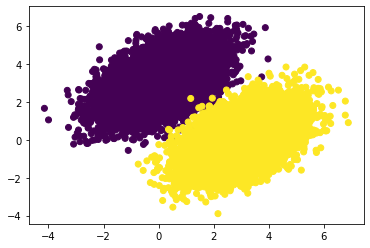

In [33]:
import tensorflow as tf 
import random
import numpy as np
import matplotlib.pyplot as plt


input_dim = 2
output_dim = 1
learning_rate = 0.01

# 가중치 행렬
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# 편향 벡터
b = tf.Variable(tf.zeros(shape=(output_dim,)))  # 초기화

def compute_predictions(features):
    return tf.matmul(features, w) + b   # 실제 모델 부분

def compute_loss(labels, predictions):
    return tf.reduce_mean(tf.square(labels - predictions))  # mean square

# 확실해진 트레이닝 함수는 decorate을 붙여서 속도를 높임
@tf.function
def train_on_batch(x, y):
    with tf.GradientTape() as tape:
        predictions = compute_predictions(x)  # output
        loss = compute_loss(y, predictions)
        dloss_dw, dloss_db = tape.gradient(loss, [w,b])
    w.assign_sub(learning_rate * dloss_dw)
    b.assign_sub(learning_rate * dloss_db)
    return loss   # 굳이 리턴 안해도 되고 확인을 위해 함

num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0,3], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3,0], cov=[[1, 0.5], [0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))
plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])  

In [34]:
# 데이터를 무작위로 섞기 / 같은 시드로 섞어서 이상하지 않게 
random.Random(1337).shuffle(features) # 데이터에 대한 셔플
random.Random(1337).shuffle(labels) # 정답에 대한 셔플

# 쉽게 배치화된 반복을 위해 데이터셋 객체 생성
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
    for step, (x, y) in enumerate(dataset):
        loss = train_on_batch(x, y)
    print("Epoch %d: 마지막 배치의 손실값 = %.4f" %(epoch, float(loss)))

Epoch 0: 마지막 배치의 손실값 = 0.1174
Epoch 1: 마지막 배치의 손실값 = 0.0711
Epoch 2: 마지막 배치의 손실값 = 0.0699
Epoch 3: 마지막 배치의 손실값 = 0.0442
Epoch 4: 마지막 배치의 손실값 = 0.0348
Epoch 5: 마지막 배치의 손실값 = 0.0337
Epoch 6: 마지막 배치의 손실값 = 0.0456
Epoch 7: 마지막 배치의 손실값 = 0.0294
Epoch 8: 마지막 배치의 손실값 = 0.0288
Epoch 9: 마지막 배치의 손실값 = 0.0248


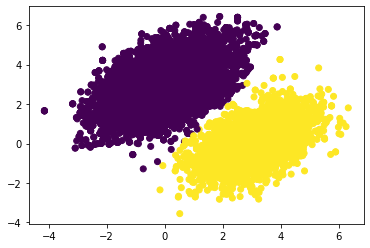

In [35]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)
# 선에 의해 칼같이 잘리는 모습을 볼 수 있음